# Main Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd
import numpy as np
from statistics import mean
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
user_data = pd.read_json('/content/drive/MyDrive/MOOCCube/entities/user.json', lines=True)

In [ ]:
user_data.shape

(199199, 4)

In [ ]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199199 entries, 0 to 199198
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            199199 non-null  object
 1   name          199199 non-null  object
 2   course_order  199199 non-null  object
 3   enroll_time   199199 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


In [ ]:
user_data.isnull().sum()

id              0
name            0
course_order    0
enroll_time     0
dtype: int64

In [ ]:
user_data.isnull().sum().any()

False

In [ ]:
user_data.isnull().sum()

id              0
name            0
course_order    0
enroll_time     0
dtype: int64

In [ ]:
user_data.isnull().sum().any()

False

In [ ]:
num_course = []

for i in range(len(user_data)):
  num_course.append(len(user_data['course_order'][i]))

user_data['number_of_course'] = num_course

In [ ]:
user_data_range = user_data[(user_data["number_of_course"] >= 5) & (user_data["number_of_course"] <= 10) ]

In [ ]:
user_data_sample = user_data_range.sample(frac=0.3, random_state = 41)

In [ ]:
course_order_list = user_data_sample["course_order"].tolist()

In [ ]:
zero_pad_course_order = []

for i in course_order_list:
  zero_pad_course_order.append([0]*(10-len(i))+i)

In [ ]:
list_check = []
for i in zero_pad_course_order:
  list_check.append(len(i))

In [ ]:
course_all_data = pd.read_json('/content/drive/MyDrive/MOOCCube/entities/course.json', lines=True)

In [ ]:
all_course = [i for i in course_all_data['id']]

In [ ]:
course_sample = [j for sub in course_order_list for j in sub]

In [ ]:
course_sample = np.unique(course_sample)

In [ ]:
teacher_course_relation = pd.read_csv('/content/drive/MyDrive/MOOCCube/relations/teacher-course.json', sep='\t', header=None)

In [ ]:
teacher_course_relation.set_axis(['teacher', 'course'], axis='columns', inplace=True)

<ipython-input-22-44f424829db4>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  teacher_course_relation.set_axis(['teacher', 'course'], axis='columns', inplace=True)


In [ ]:
teacher_course_relation = teacher_course_relation.iloc[:,[1, 0]]

In [ ]:
teacher_course_relation = teacher_course_relation[teacher_course_relation['course'].isin(course_sample)]

In [ ]:
school_course_relation = pd.read_csv('/content/drive/MyDrive/MOOCCube/relations/school-course.json', sep='\t', header=None)

In [ ]:
school_course_relation.set_axis(['school', 'course'], axis='columns', inplace=True)

<ipython-input-26-ce3aad33b220>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  school_course_relation.set_axis(['school', 'course'], axis='columns', inplace=True)


In [ ]:
school_course_relation = school_course_relation.iloc[:,[1, 0]]

In [ ]:
school_course_relation = school_course_relation[school_course_relation['course'].isin(course_sample)]

In [ ]:
course_concept_relation = pd.read_csv('/content/drive/MyDrive/MOOCCube/relations/course-concept.json', sep='\t', header=None)

In [ ]:
course_concept_relation.set_axis(['course', 'concept'], axis='columns', inplace=True)

<ipython-input-30-54caa48fa8c9>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  course_concept_relation.set_axis(['course', 'concept'], axis='columns', inplace=True)


In [ ]:
course_concept_relation = course_concept_relation[course_concept_relation['course'].isin(course_sample)]

In [ ]:
concept_prerequisite_relation = pd.read_csv('/content/drive/MyDrive/MOOCCube/relations/prerequisite-dependency.json', sep='\t', header=None)

In [ ]:
concept_prerequisite_relation.set_axis(['prerequisite concept', 'concept'], axis='columns', inplace=True)

<ipython-input-33-a58fdf4953a5>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  concept_prerequisite_relation.set_axis(['prerequisite concept', 'concept'], axis='columns', inplace=True)


In [ ]:
concept_prerequisite_relation = concept_prerequisite_relation[concept_prerequisite_relation['concept'].isin(course_concept_relation['concept'])]

In [ ]:
concept = []

for i in concept_prerequisite_relation['concept']:
  concept.append(i)

for i in concept_prerequisite_relation['prerequisite concept']:
  concept.append(i)

In [ ]:
concept = np.unique(concept)

In [ ]:
course_concept_relation_concept_filter = course_concept_relation[course_concept_relation['concept'].isin(concept)]

In [ ]:
course_with_prerequisite_concept = pd.merge(course_concept_relation_concept_filter, concept_prerequisite_relation,  how = "left", on = 'concept')

In [ ]:
course_with_prerequisite_concept.fillna("0", inplace=True)

In [ ]:
course_prerequisite = np.unique(course_with_prerequisite_concept['course'])

In [ ]:
course_with_prerequisite_concept.fillna(0, inplace=True)

In [ ]:
course_columns = ['course_1', 'course_2', 'course_3', 'course_4', 'course_5', 'course_6', 'course_7', 'course_8', 'course_9', 'course_10']

In [ ]:
data_course = pd.DataFrame(zero_pad_course_order, columns = course_columns, dtype = str)

In [ ]:
data_school = data_course.copy()

In [ ]:
dict_lookup_course_school = dict(zip(school_course_relation['course'], school_course_relation['school']))

In [ ]:
dict_lookup_course_school['0'] = '0'

In [ ]:
dict_lookup_course_school['C_course-v1:TsinghuaX+AP000003X+2019_T1'] = 'S_TsinghuaX'

In [ ]:
for i in course_columns:
  data_school[i] = [dict_lookup_course_school[item] for item in data_school[i]]

In [ ]:
school_columns = ['school_1', 'school_2', 'school_3', 'school_4', 'school_5', 'school_6', 'school_7', 'school_8', 'school_9', 'school_10']

In [ ]:
data_school.columns = school_columns

In [ ]:
dict_lookup_course_teacher = dict(zip(teacher_course_relation['course'], teacher_course_relation['teacher']))

In [ ]:
data_teacher = data_course.copy()

In [ ]:
dict_lookup_course_teacher['0'] = '0'

In [ ]:
dict_lookup_course_teacher['C_course-v1:Tsinghua+Thesis2017X+2017_T1'] = 'T_研究生院'
dict_lookup_course_teacher['C_course-v1:TsinghuaX+AP000003X+2019_T1'] = 'T_李强'
dict_lookup_course_teacher['C_course-v1:Tsinghua+20150001+sp'] = 'T_程新兵'
dict_lookup_course_teacher['C_course-v1:Tsinghua+20181011X+2018_T2'] = 'T_谢德军'
dict_lookup_course_teacher['C_course-v1:SYJU+030020406+2019_T1'] = 'T_姜桂荣'
dict_lookup_course_teacher['C_course-v1:TsinghuaX+70167012X+sp'] = 'T_朱颖心'
dict_lookup_course_teacher['C_course-v1:WellesleyX+HIST229x+sp'] = 'T_Adam Van Arsdale'
dict_lookup_course_teacher['C_course-v1:JSUX+2017011101X+sp'] = 'T_李芳宇'
dict_lookup_course_teacher['C_course-v1:HBNU+2019051509X+2019_T1'] = 'T_于丹'

In [ ]:
for i in course_columns:
  data_teacher[i] = [dict_lookup_course_teacher[item] for item in data_teacher[i]]

In [ ]:
teacher_columns = ['teacher_1', 'teacher_2', 'teacher_3', 'teacher_4', 'teacher_5', 'teacher_6', 'teacher_7', 'teacher_8', 'teacher_9', 'teacher_10']

In [ ]:
data_teacher.columns = teacher_columns

In [ ]:
course_name = [i for i in np.unique(course_sample)]
course_number = [i for i in range(1, len(np.unique((course_sample)))+1)]
course_encode = {course_name[i]: course_number[i] for i in range(len(course_name))}

course_encode["0"] = 0

In [ ]:
school_name = [i for i in np.unique(list(school_course_relation['school']))]
school_number = [i for i in range(1, len(np.unique(list(school_course_relation['school'])))+1)]
school_encode = {school_name[i]: school_number[i] for i in range(len(school_name))}

school_encode["0"] = 0

In [ ]:
teacher_unique = np.unique(list(dict_lookup_course_teacher.values()))
teacher_name = [i for i in teacher_unique if i != "0"]
teacher_number = [i for i in range(1, len(teacher_name)+1)]
teacher_encode = {teacher_name[i]: teacher_number[i] for i in range(len(teacher_name))}

teacher_encode["0"] = 0

In [ ]:
def encode_decode_data(data_name, column_name, dict_name):
  for i in column_name:
      data_name[i] = [dict_name[item] for item in data_name[i]]

  return data_name

In [ ]:
data_course = encode_decode_data(data_course, course_columns, course_encode)
data_teacher = encode_decode_data(data_teacher, teacher_columns, teacher_encode)
data_school = encode_decode_data(data_school, school_columns, school_encode)

In [ ]:
course_decode = {y: x for x, y in course_encode.items()}
teacher_decode = {y: x for x, y in teacher_encode.items()}
school_decode = {y: x for x, y in school_encode.items()}

In [ ]:
data_prerequisite_concept_relation.insert(loc = 0,column = 'concept_0&1',value = 0)

# Evaluation Function Determination

In [ ]:
import math
from statistics import mean

def apk_act(actual, predicted, k=5):

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):

        if p == actual:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    return score/k

In [ ]:
def hr_act(actual, predicted, k=5):

    num_hits = 0.0

    for i,p in enumerate(predicted):

        if p == actual:
            num_hits = 1.0
            pass

    return num_hits

In [ ]:
def rr_act(actual, predicted, k=5):

    num_hits = 0.0
    score = 0.0

    for i,p in enumerate(predicted):

        if p == actual:
            num_hits = 1.0
            score = num_hits/(i+1)
            pass

    return score

In [ ]:
def ndcg_act(actual, predicted, k=5):


    dcg = []
    idcg = []
    gain = 0.0

    for i in range(1,k+1):
      idcg.append(1/(math.log2(i+1)))

    for i,p in enumerate(predicted):

        if p == actual:
            gain = 1.0
            dcg.append(gain/(math.log2((i+1)+1)))

        else:
            dcg.append(0)

    return (sum(dcg))/(sum(idcg))

# Multi-GAN & Multi-MDGAN

## Data Preprocessing - Multi-GAN & Multi-MDGAN

In [ ]:
scale_list = [i for i in range(len(course_sample)+1)]
maximum = scale_list[-1]
minimum = scale_list[0]

In [ ]:
print(maximum)
print(minimum)

660
0


In [ ]:
def MinMaxScaler(x):
        y = (x - minimum) / (maximum - minimum)
        return y

In [ ]:
def InverseMinMaxScaler(x):
        y = round(x*(maximum - minimum) + minimum)
        return y

In [ ]:
data_course_scale = data_course.apply(np.vectorize(MinMaxScaler))

In [ ]:
X_sc = data_course_scale.drop('course_10', axis=1)
Y_sc = data_course_scale['course_10']

In [ ]:
X_train_sc, X_test_sc, Y_train_sc, Y_test_sc = train_test_split(X_sc,Y_sc,test_size = 0.2, random_state = 42)

In [ ]:
rows_train_sc = list(X_train_sc.index)
rows_test_sc = list(X_test_sc.index)

In [ ]:
X_train_sc = X_train_sc.astype('float32')
Y_train_sc = Y_train_sc.astype('float32')
X_test_sc = X_test_sc.astype('float32')
Y_test_sc = Y_test_sc.astype('float32')

In [ ]:
dict_course_school_encode_final = dict_lookup_course_school.copy()

In [ ]:
for i in course_encode.keys():
  dict_course_school_encode_final[i] = school_encode[dict_lookup_course_school[i]]

In [ ]:
for i in course_encode.keys():
  dict_course_school_encode_final[course_encode[i]]= dict_course_school_encode_final.pop(i)

In [ ]:
dict_course_teacher_encode_final = dict_lookup_course_teacher.copy()

In [ ]:
for i in course_encode.keys():
  dict_course_teacher_encode_final[i] = teacher_encode[dict_lookup_course_teacher[i]]

In [ ]:
for i in course_encode.keys():
  dict_course_teacher_encode_final[course_encode[i]] = dict_course_teacher_encode_final.pop(i)

### Validation Data Processing - Multi-GAN & Multi-MDGAN

In [ ]:
Y_test_unscale = Y_test_sc.apply(np.vectorize(InverseMinMaxScaler))

In [ ]:
X_test_unscale = X_test_sc.apply(np.vectorize(InverseMinMaxScaler))

## Multi-GAN

### Modelling - MultiGAN

In [ ]:
filename = '/content/drive/MyDrive/MOOCCube/Models/Edu_MultiGAN1.pkl'
multigan1 = pickle.load(open(filename, 'rb'))

filename = '/content/drive/MyDrive/MOOCCube/Models/Edu_MultiGAN2.pkl'
multigan2 = pickle.load(open(filename, 'rb'))

filename = '/content/drive/MyDrive/MOOCCube/Models/Edu_MultiGAN3.pkl'
multigan3 = pickle.load(open(filename, 'rb'))

filename = '/content/drive/MyDrive/MOOCCube/Models/Edu_MultiGAN4.pkl'
multigan4 = pickle.load(open(filename, 'rb'))

filename = '/content/drive/MyDrive/MOOCCube/Models/Edu_MultiGAN5.pkl'
multigan5 = pickle.load(open(filename, 'rb'))

In [ ]:
pred_multigan1 = multigan1.predict(X_test_sc)
pred_multigan2 = multigan2.predict(X_test_sc)
pred_multigan3 = multigan3.predict(X_test_sc)
pred_multigan4 = multigan4.predict(X_test_sc)
pred_multigan5 = multigan5.predict(X_test_sc)

57/57 [==============================] - 0s 2ms/step


In [ ]:
pred_multigan1 = pd.DataFrame(pred_multigan1)
pred_multigan2 = pd.DataFrame(pred_multigan2)
pred_multigan3 = pd.DataFrame(pred_multigan3)
pred_multigan4 = pd.DataFrame(pred_multigan4)
pred_multigan5 = pd.DataFrame(pred_multigan5)

In [ ]:
pred_multigan = pd.concat([pred_multigan1, pred_multigan2, pred_multigan3, pred_multigan4, pred_multigan5], axis=1, join='outer')
pred_multigan.columns = [1,2,3,4,5]

In [ ]:
pred_multigan_unscale = pred_multigan.apply(np.vectorize(InverseMinMaxScaler))

### Evaluation - Multi-GAN

#### Evaluation Actualness - Multi-GAN

In [ ]:
multigan_map_5_actual = []

for i in range(len(Y_test_unscale)):
  multigan_map_5_actual.append(apk_act(Y_test_unscale.iloc[i],list(pred_multigan_unscale.iloc[i]), k=5))

map_MultiGAN_actual = mean(multigan_map_5_actual)
map_MultiGAN_actual

0.0005856107083100948

In [ ]:
multigan_hit_5_actual = []

for i in range(len(Y_test_unscale)):
  multigan_hit_5_actual.append(hr_act(Y_test_unscale.iloc[i],list(pred_multigan_unscale.iloc[i]), k=5))

hr_MultiGAN_actual = mean(multigan_hit_5_actual)
hr_MultiGAN_actual

0.0050195203569436695

In [ ]:
multigan_rr_5_actual = []

for i in range(len(Y_test_unscale)):
  multigan_rr_5_actual.append(rr_act(Y_test_unscale.iloc[i],list(pred_multigan_unscale.iloc[i]), k=5))

rr_MultiGAN_actual = mean(multigan_rr_5_actual)
rr_MultiGAN_actual

0.002928053541550474

In [ ]:
multigan_ndcg_5_actual = []

for i in range(len(Y_test_unscale)):
  multigan_ndcg_5_actual.append(ndcg_act(Y_test_unscale.iloc[i],list(pred_multigan_unscale.iloc[i]), k=5))

ndcg_MultiGAN_actual = mean(multigan_ndcg_5_actual)
ndcg_MultiGAN_actual

0.001171367430587303

## Multi-MDGAN

### Modelling - Multi-MDGAN

In [ ]:
filename = '/content/drive/MyDrive/MOOCCube/Models/Edu_MultiMDGAN1.pkl'
multimdgan1 = pickle.load(open(filename, 'rb'))

filename = '/content/drive/MyDrive/MOOCCube/Models/Edu_MultiMDGAN2.pkl'
multimdgan2 = pickle.load(open(filename, 'rb'))

filename = '/content/drive/MyDrive/MOOCCube/Models/Edu_MultiMDGAN3.pkl'
multimdgan3 = pickle.load(open(filename, 'rb'))

filename = '/content/drive/MyDrive/MOOCCube/Models/Edu_MultiMDGAN4.pkl'
multimdgan4 = pickle.load(open(filename, 'rb'))

filename = '/content/drive/MyDrive/MOOCCube/Models/Edu_MultiMDGAN5.pkl'
multimdgan5 = pickle.load(open(filename, 'rb'))

In [ ]:
pred_multimdgan1 = multimdgan1.predict(X_test_sc)
pred_multimdgan2 = multimdgan2.predict(X_test_sc)
pred_multimdgan3 = multimdgan3.predict(X_test_sc)
pred_multimdgan4 = multimdgan4.predict(X_test_sc)
pred_multimdgan5 = multimdgan5.predict(X_test_sc)

57/57 [==============================] - 0s 1ms/step


In [ ]:
pred_multimdgan1 = pd.DataFrame(pred_multimdgan1)
pred_multimdgan2 = pd.DataFrame(pred_multimdgan2)
pred_multimdgan3 = pd.DataFrame(pred_multimdgan3)
pred_multimdgan4 = pd.DataFrame(pred_multimdgan4)
pred_multimdgan5 = pd.DataFrame(pred_multimdgan5)

In [ ]:
pred_multimdgan = pd.concat([pred_multimdgan1, pred_multimdgan2, pred_multimdgan3, pred_multimdgan4, pred_multimdgan5], axis=1, join='outer')
pred_multimdgan.columns = [1,2,3,4,5]

In [ ]:
pred_multimdgan_unscale = pred_multimdgan.apply(np.vectorize(InverseMinMaxScaler))

### Evaluation - Multi-MDGAN

#### Evaluation Actualness - Multi-MDGAN

In [ ]:
multimdgan_map_5_actual = []

for i in range(len(Y_test_unscale)):
  multimdgan_map_5_actual.append(apk_act(Y_test_unscale.iloc[i],list(pred_multimdgan_unscale.iloc[i]), k=5))

map_MultiMDGAN_actual = mean(multimdgan_map_5_actual)
map_MultiMDGAN_actual

0.0010113403978434653

In [ ]:
multimdgan_hit_5_actual = []

for i in range(len(Y_test_unscale)):
  multimdgan_hit_5_actual.append(hr_act(Y_test_unscale.iloc[i],list(pred_multimdgan_unscale.iloc[i]), k=5))

hr_MultiMDGAN_actual = mean(multimdgan_hit_5_actual)
hr_MultiMDGAN_actual

0.011154489682097044

In [ ]:
multimdgan_rr_5_actual = []

for i in range(len(Y_test_unscale)):
  multimdgan_rr_5_actual.append(rr_act(Y_test_unscale.iloc[i],list(pred_multimdgan_unscale.iloc[i]), k=5))

rr_MultiMDGAN_actual = mean(multimdgan_rr_5_actual)
rr_MultiMDGAN_actual

0.0045919315857966166

In [ ]:
multimdgan_ndcg_5_actual = []

for i in range(len(Y_test_unscale)):
  multimdgan_ndcg_5_actual.append(ndcg_act(Y_test_unscale.iloc[i],list(pred_multimdgan_unscale.iloc[i]), k=5))

ndcg_MultiMDGAN_actual = mean(multimdgan_ndcg_5_actual)
ndcg_MultiMDGAN_actual

0.0022236288240697587

# GAN & MDGAN

## Data Preprocessing - GAN & MDGAN

In [ ]:
list_oh_join = []

for i in range(len(course_sample)+1):
  list_oh_join.append([i]*10)

data_oh_join = pd.DataFrame(list_oh_join, columns = course_columns)

In [ ]:
frames = [data_course, data_oh_join]

new_data_course = pd.concat(frames)
new_data_course = new_data_course.reset_index(drop=True)

In [ ]:
one_hot_encoded_data = pd.get_dummies(new_data_course)

In [ ]:
enc_course = OneHotEncoder()
oh_data = enc_course.fit_transform(one_hot_encoded_data)
oh_data=oh_data.toarray()

In [ ]:
oh_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
oh_data=pd.DataFrame(oh_data, columns=enc_course.get_feature_names_out())

In [ ]:
oh_data = oh_data.iloc[:data_course.shape[0]]

In [ ]:
num_diff = oh_data.shape[1]/10
num_diff = int(num_diff)

In [ ]:
X_oh = oh_data.iloc[:, 0:-num_diff]
Y_oh = oh_data.iloc[:, -num_diff:]

In [ ]:
X_train_oh, X_test_oh, Y_train_oh, Y_test_oh = train_test_split(X_oh,Y_oh,test_size = 0.2, random_state = 42)

In [ ]:
rows_train_oh = list(X_train_oh.index)
rows_test_oh = list(X_test_oh.index)

In [ ]:
X_train_oh = X_train_oh.astype('float32')
Y_train_oh = Y_train_oh.astype('float32')
X_test_oh = X_test_oh.astype('float32')
Y_test_oh = Y_test_oh.astype('float32')

### Validation Data Processing - GAN & MDGAN

In [ ]:
data_inverse_oh = enc_course.inverse_transform(oh_data)

In [ ]:
data_inverse_oh = pd.DataFrame(data_inverse_oh, columns = course_columns)

In [ ]:
data_inverse_oh_test = data_inverse_oh.loc[data_inverse_oh.index[rows_test_oh]]

In [ ]:
data_inverse_oh_test_X = data_inverse_oh_test.drop('course_10', axis=1)
data_inverse_oh_test_Y = data_inverse_oh_test['course_10']

In [ ]:
X_test = data_inverse_oh_test_X
Y_test = data_inverse_oh_test_Y

## GAN

### Modelling - GAN

In [ ]:
filename = '/content/drive/MyDrive/MOOCCube/Models/Edu_GAN.pkl'
gan = pickle.load(open(filename, 'rb'))

In [ ]:
pred_gan = gan.predict(X_test_oh)

57/57 [==============================] - 0s 3ms/step


In [ ]:
pred_gan = pd.DataFrame(pred_gan, columns = list(Y_test_oh.columns.values))

In [ ]:
course_columns_number = [i for i in range(len(course_sample)+1)]

In [ ]:
pred_gan.columns = course_columns_number

In [ ]:
pred_gan_top5 = pd.DataFrame(pred_gan.apply(lambda x: x.nlargest(5).index.tolist(), axis=1).tolist(),
                           columns=['1','2','3','4','5'])

### Evaluation - GAN

#### Evaluation Actualness - GAN

In [ ]:
gan_map_5_actual = []

for i in range(len(data_inverse_oh_test_Y)):
  gan_map_5_actual.append(apk_act(data_inverse_oh_test_Y.iloc[i],list(pred_gan_top5.iloc[i]), k=5))

map_GAN_actual = mean(gan_map_5_actual)
map_GAN_actual

0.016703848298940324

In [ ]:
gan_hit_5_actual = []

for i in range(len(data_inverse_oh_test_Y)):
  gan_hit_5_actual.append(hr_act(data_inverse_oh_test_Y.iloc[i],list(pred_gan_top5.iloc[i]), k=5))

hr_GAN_actual = mean(gan_hit_5_actual)
hr_GAN_actual

0.17456776352481873

In [ ]:
gan_rr_5_actual = []

for i in range(len(data_inverse_oh_test_Y)):
  gan_rr_5_actual.append(rr_act(data_inverse_oh_test_Y.iloc[i],list(pred_gan_top5.iloc[i]), k=5))

rr_GAN_actual = mean(gan_rr_5_actual)

rr_GAN_actual

0.08351924149470162

In [ ]:
gan_ndcg_5_actual = []

for i in range(len(data_inverse_oh_test_Y)):
  gan_ndcg_5_actual.append(ndcg_act(data_inverse_oh_test_Y.iloc[i],list(pred_gan_top5.iloc[i]), k=5))

ndcg_GAN_actual = mean(gan_ndcg_5_actual)
ndcg_GAN_actual

0.03582225943906229

## MDGAN

### Modelling - MDGAN

In [ ]:
filename = '/content/drive/MyDrive/MOOCCube/Models/Edu_MDGAN.pkl'
mdgan = pickle.load(open(filename, 'rb'))

In [ ]:
pred_mdgan = mdgan.predict(X_test_oh)

57/57 [==============================] - 0s 6ms/step


In [ ]:
pred_mdgan = pd.DataFrame(pred_mdgan, columns = list(Y_test_oh.columns.values))

In [ ]:
course_columns_number = [i for i in range(len(course_sample)+1)]

In [ ]:
pred_mdgan.columns = course_columns_number

In [ ]:
pred_mdgan_top5 = pd.DataFrame(pred_mdgan.apply(lambda x: x.nlargest(5).index.tolist(), axis=1).tolist(),
                           columns=['1','2','3','4','5'])

### Evaluation - MDGAN

#### Evaluation Actualness - MDGAN

In [ ]:
mdgan_map_5_actual = []

for i in range(len(data_inverse_oh_test_Y)):
  mdgan_map_5_actual.append(apk_act(data_inverse_oh_test_Y.iloc[i],list(pred_mdgan_top5.iloc[i]), k=5))

map_MDGAN_actual = mean(mdgan_map_5_actual)
map_MDGAN_actual

0.005168246886038297

In [ ]:
mdgan_hit_5_actual = []

for i in range(len(data_inverse_oh_test_Y)):
  mdgan_hit_5_actual.append(hr_act(data_inverse_oh_test_Y.iloc[i],list(pred_mdgan_top5.iloc[i]), k=5))

hr_MDGAN_actual = mean(mdgan_hit_5_actual)
hr_MDGAN_actual

0.08254322364751812

In [ ]:
mdgan_rr_5_actual = []

for i in range(len(data_inverse_oh_test_Y)):
  mdgan_rr_5_actual.append(rr_act(data_inverse_oh_test_Y.iloc[i],list(pred_mdgan_top5.iloc[i]), k=5))

rr_MDGAN_actual = mean(mdgan_rr_5_actual)
rr_MDGAN_actual

0.025841234430191484

In [ ]:
mdgan_ndcg_5_actual = []

for i in range(len(data_inverse_oh_test_Y)):
  mdgan_ndcg_5_actual.append(ndcg_act(data_inverse_oh_test_Y.iloc[i],list(pred_mdgan_top5.iloc[i]), k=5))

ndcg_MDGAN_actual = mean(mdgan_ndcg_5_actual)
ndcg_MDGAN_actual

0.01340343456202289

# CF

## Data Preprocessing - CF

In [ ]:
user_int_data = pd.read_json('/content/drive/MyDrive/MOOCCube/additional_information/implicit_feedback.txt', lines=True)

In [ ]:
user_item_int_list = []

for i in range(user_int_data.shape[0]):
  for j in range(len(user_int_data['activity'][i])):
    user_item_int_list.append([user_int_data['id'][i],user_int_data['activity'][i][j]['course_id'],user_int_data['activity'][i][j]['watching_count']])

In [ ]:
user_item_int_list

[['U_8126464', 'C_course-v1:TsinghuaX+00740123_X+sp', 3],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123X+2019_T1', 3],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123_X+sp', 5],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123X+2019_T1', 5],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123_X+sp', 5],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123X+2019_T1', 5],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123_X+sp', 10],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123X+2019_T1', 10],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123_X+sp', 7],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123X+2019_T1', 7],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123_X+sp', 3],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123X+2019_T1', 3],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123_X+sp', 1],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123X+2019_T1', 1],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123_X+sp', 4],
 ['U_8126464', 'C_course-v1:TsinghuaX+00740123X+2019_T1', 4],
 ['U_8126464', 'C_course-v1:TsinghuaX+

In [ ]:
user_item_data = pd.DataFrame(user_item_int_list, columns =['user_id', 'course_id', 'interaction'])

In [ ]:
user_item_data = user_item_data.drop_duplicates(subset=["user_id", "course_id"], keep='first')

In [ ]:
id_list = list(set(list(user_data_sample['id'])) & set(list(user_item_data['user_id'])))

In [ ]:
cf_user = user_data_sample.loc[user_data_sample['id'].isin(id_list)]

In [ ]:
cf_user_ind = cf_user.index

In [ ]:
rm_final_item_cf = []

for i in range(cf_user.shape[0]):
  rm_final_item_cf.append([cf_user.iloc[i][0],cf_user.iloc[i][2][-1]])

In [ ]:
user_item_index = []
for i in range(len(rm_final_item_cf)):
  index_rm = user_item_data[(user_item_data['user_id'] == rm_final_item_cf[i][0]) & (user_item_data['course_id'] == rm_final_item_cf[i][1])].index
  user_item_index.append(index_rm)

In [ ]:
new_index = [ele for ele in user_item_index if ele != "Int64Index([], dtype='int64')"]

<ipython-input-167-252c7e32f89d>:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  new_index = [ele for ele in user_item_index if ele != "Int64Index([], dtype='int64')"]


In [ ]:
new_index_tr = []
for i in range(len(new_index)):
   new_index_tr.append(new_index[i][0])

In [ ]:
user_item_data.drop(index = new_index_tr, inplace = True)

In [ ]:
course_info_data = pd.read_json('/content/drive/MyDrive/MOOCCube/entities/course.json', lines=True)

In [ ]:
course_list_diff = list(set(list(course_info_data['id'])).symmetric_difference(set(list(course_encode.keys()))))

In [ ]:
course_encode['C_course-v1:nxu+2018122713+2019_T1'] = 661
course_encode['C_course-v1:SDSNAssociation+ECD001+sp'] = 662
course_encode['C_course-v1:SWPU+3615001035+2019_T1'] = 663
course_encode['C_course-v1:LUIBE+201808064+2019_T1'] = 664
course_encode['C_course-v1:nxu+2018122711+2019_T1'] = 665
course_encode['C_course-v1:CIE+JD_2017+2019_T1'] = 666
course_encode['C_course-v1:dlmu+20180906+2019_T1'] = 667
course_encode['C_course-v1:BNU+2018122405X+2019_T1'] = 668
course_encode['C_course-v1:CIE+CIE2016005+2019_T1'] = 669
course_encode['C_course-v1:HIT+HIT2016001+2019_T1'] = 670
course_encode['C_course-v1:SDSNAssociation+PB+sp'] = 671
course_encode['C_course-v1:CIE+CIE2017008+2019_T1'] = 672
course_encode['C_course-v1:FZXY+20180301001+2019_T1'] = 673
course_encode['C_course-v1:CIE+CIE2017005+2019_T1'] = 674
course_encode['C_course-v1:TsinghuaX+80511503X+2019_T1'] = 675
course_encode['C_course-v1:CIE+CIE2017001+2019_T1'] = 676
course_encode['C_course-v1:SDSNAssociation+SC001+sp'] = 677
course_encode['C_course-v1:TJUFE+2018122506X+2019_T1'] = 678
course_encode['C_course-v1:TsinghuaX+01510192X+2019_T1'] = 679
course_encode['C_course-v1:XYSFXY+20181024X+2019_T1'] = 680
course_encode['C_course-v1:HNU+20180424001+2018_T1'] = 681
course_encode['C_course-v1:CSMZXY+2018111301X+2019_T2'] = 682
course_encode['C_course-v1:TsinghuaX+80240372X+sp'] = 683
course_encode['C_course-v1:JNU+11020009+2019_T1'] = 684
course_encode['C_course-v1:BSU+2018122405X+2019_T1'] = 685
course_encode['C_course-v1:SEU+00690803_2+2019_T1'] = 686
course_encode['C_course-v1:PSFFC+2018102404X+2018_T2'] = 687
course_encode['C_course-v1:NEU+2018051501+sp'] = 688
course_encode['C_course-v1:CSU+2019043001X+2019_T1'] = 689
course_encode['C_course-v1:SDSNAssociation+TOW001+sp'] = 690
course_encode['C_course-v1:CIE+CIE2016004+2019_T1'] = 691
course_encode['C_course-v1:SXPI+20171101002+sp'] = 692
course_encode['C_course-v1:KMUSTX+1803168+2018_T2'] = 693
course_encode['C_course-v1:SDUx+00931800X+sp'] = 694
course_encode['C_course-v1:BSU+2018122404X+2019_T1'] = 695
course_encode['C_course-v1:BNU+CHE21128011+2019_T1'] = 696
course_encode['C_course-v1:ZZU+20180116001+2019_T1'] = 697
course_encode['C_course-v1:SDSNAssociation+CSN+sp'] = 698
course_encode['C_course-v1:TsinghuaX+70340063X+2019_T1'] = 699
course_encode['C_course-v1:HEBUT+2019040202X+2019_T1'] = 700
course_encode['C_course-v1:FAFU+55071003+2019_T1'] = 701
course_encode['C_course-v1:XJTU+2018122507X+2018_T2'] = 702
course_encode['C_course-v1:JNU+07009215+2019_T1'] = 703
course_encode['C_course-v1:CIE+CIE2016002+2019_T1'] = 704
course_encode['C_course-v1:BNU+2017112001X+2019_T1'] = 705
course_encode['C_course-v1:HUBU+HU08001X+2019_T1'] = 706

In [ ]:
course_list_diff = list(set(list(course_info_data['id'])).symmetric_difference(set(list(dict_lookup_course_school.keys()))))

In [ ]:
course_list_diff = list(set(list(course_info_data['id'])).symmetric_difference(set(list(dict_lookup_course_teacher.keys()))))

In [ ]:
user_item_data['course_id'] = [course_encode[item] for item in user_item_data['course_id']]

In [ ]:
user_item_data_matrix = user_item_data.pivot(index='user_id', columns='course_id', values='interaction')
user_item_data_matrix = user_item_data_matrix.fillna(0)

In [ ]:
from scipy.sparse import csr_matrix
mat_items_users=csr_matrix(user_item_data_matrix.values)
mat_items_users

<5000x602 sparse matrix of type '<class 'numpy.float64'>'
	with 27526 stored elements in Compressed Sparse Row format>

## Modelling - CF

In [ ]:
from sklearn.neighbors import NearestNeighbors
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(mat_items_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
#from fuzzywuzzy import process
def Recommender(course_name):#, data, model, n_recommendations):
    model_knn.fit(mat_items_users)
    #course_index = process.extractOne(course_name, user_item_data['course_id'])[2]
    course_index = course_name
    distances, indices = model_knn.kneighbors(mat_items_users[course_index], n_neighbors=6)
    recc_course_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
    recommend_frame = []
    for val in recc_course_indices:
#         print(movie_names['title'][val[0]]
        recommend_frame.append(user_item_data['course_id'].iloc[val[0]])
        #recommend_frame.append([val[0]])

    ###df = pd.DataFrame(recommend_frame, index = range(1,n_recommendations))

    return recommend_frame

In [ ]:
pred_CF = []

for i in X_test_unscale['course_9']:
  pred_CF.append(list(Recommender(i)))

In [ ]:
pred_CF = pd.DataFrame(pred_CF)

In [ ]:
pred_CF

,0,1,2,3,4
0,434,355,503,406,348
1,445,155,582,449,586
2,309,434,406,503,483
3,558,301,115,408,321
4,309,222,437,515,408
...,...,...,...,...,...
1788,484,449,348,449,415
1789,437,449,342,635,26
1790,209,172,625,408,535
1791,227,364,158,434,290


## Evaluation - CF

### Evaluation Actualness - CF

In [ ]:
CF_map_5_actual = []

for i in range(len(Y_test)):
  CF_map_5_actual.append(apk_act(Y_test.iloc[i],list(pred_CF.iloc[i]), k=5))

map_CF_actual = mean(CF_map_5_actual)
map_CF_actual

0.004948875255623722

In [ ]:
CF_hit_5_actual = []

for i in range(len(Y_test)):
  CF_hit_5_actual.append(hr_act(Y_test.iloc[i],list(pred_CF.iloc[i]), k=5))

hr_CF_actual = mean(CF_hit_5_actual)
hr_CF_actual

0.05298382598996096

In [ ]:
CF_rr_5_actual = []

for i in range(len(Y_test)):
  CF_rr_5_actual.append(rr_act(Y_test.iloc[i],list(pred_CF.iloc[i]), k=5))

rr_CF_actual = mean(CF_rr_5_actual)
rr_CF_actual

0.023238520171035507

In [ ]:
CF_ndcg_5_actual = []

for i in range(len(Y_test)):
  CF_ndcg_5_actual.append(ndcg_act(Y_test.iloc[i],list(pred_CF.iloc[i]), k=5))

ndcg_CF_actual = mean(CF_ndcg_5_actual)
ndcg_CF_actual

0.010745129220730633

#CB

## Data Preprocessing - CB

In [ ]:
course_info_data = pd.read_json('/content/drive/MyDrive/MOOCCube/entities/course.json', lines=True)

In [ ]:
course_info_data = course_info_data[['id','name', 'prerequisites', 'about']]

In [ ]:
add_column = list(course_info_data['id'])

In [ ]:
course_info_data['teacher'] = add_column
course_info_data['school'] = add_column

In [ ]:
teacher_course_relation = pd.read_csv('/content/drive/MyDrive/MOOCCube/relations/teacher-course.json', sep='\t', header=None)

In [ ]:
teacher_course_relation.set_axis(['teacher', 'course'], axis='columns', inplace=True)

<ipython-input-192-44f424829db4>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  teacher_course_relation.set_axis(['teacher', 'course'], axis='columns', inplace=True)


In [ ]:
teacher_course_relation = teacher_course_relation.iloc[:,[1, 0]]

In [ ]:
school_course_relation = pd.read_csv('/content/drive/MyDrive/MOOCCube/relations/school-course.json', sep='\t', header=None)

In [ ]:
school_course_relation.set_axis(['school', 'course'], axis='columns', inplace=True)

<ipython-input-195-ce3aad33b220>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  school_course_relation.set_axis(['school', 'course'], axis='columns', inplace=True)


In [ ]:
school_course_relation = school_course_relation.iloc[:,[1, 0]]

In [ ]:
dict_lookup_course_school = dict(zip(school_course_relation['course'], school_course_relation['school']))

In [ ]:
dict_lookup_course_school['0'] = '0'

In [ ]:
dict_lookup_course_school['C_course-v1:TsinghuaX+AP000003X+2019_T1'] = 'S_TsinghuaX'

In [ ]:
dict_lookup_course_teacher = dict(zip(teacher_course_relation['course'], teacher_course_relation['teacher']))

In [ ]:
dict_lookup_course_teacher['0'] = '0'

In [ ]:
dict_lookup_course_teacher['C_course-v1:Tsinghua+Thesis2017X+2017_T1'] = 'T_研究生院'
dict_lookup_course_teacher['C_course-v1:TsinghuaX+AP000003X+2019_T1'] = 'T_李强'
dict_lookup_course_teacher['C_course-v1:Tsinghua+20150001+sp'] = 'T_程新兵'
dict_lookup_course_teacher['C_course-v1:Tsinghua+20181011X+2018_T2'] = 'T_谢德军'
dict_lookup_course_teacher['C_course-v1:SYJU+030020406+2019_T1'] = 'T_姜桂荣'
dict_lookup_course_teacher['C_course-v1:TsinghuaX+70167012X+sp'] = 'T_朱颖心'
dict_lookup_course_teacher['C_course-v1:WellesleyX+HIST229x+sp'] = 'T_Adam Van Arsdale'
dict_lookup_course_teacher['C_course-v1:JSUX+2017011101X+sp'] = 'T_李芳宇'
dict_lookup_course_teacher['C_course-v1:HBNU+2019051509X+2019_T1'] = 'T_于丹'

In [ ]:
course_info_data['teacher'] = [dict_lookup_course_teacher[item] for item in course_info_data['teacher']]
course_info_data['school'] = [dict_lookup_course_school[item] for item in course_info_data['school']]

In [ ]:
dict_lookup_course_prerequisite['C_course-v1:SEU+00690803_2+2019_T1'] = ["0"]
dict_lookup_course_prerequisite['C_course-v1:NEU+2018051501+sp']=["0"]
dict_lookup_course_prerequisite['C_course-v1:CIE+CIE2017001+2019_T1'] = ["0"]
dict_lookup_course_prerequisite['C_course-v1:LUIBE+201808064+2019_T1']=["0"]
dict_lookup_course_prerequisite['C_course-v1:SDSNAssociation+SC001+sp'] = ["0"]
dict_lookup_course_prerequisite['C_course-v1:SDSNAssociation+CSN+sp']=["0"]
dict_lookup_course_prerequisite['C_course-v1:SDSNAssociation+ECD001+sp'] = ["0"]
dict_lookup_course_prerequisite['C_course-v1:SDSNAssociation+PB+sp']=["0"]
dict_lookup_course_prerequisite['C_course-v1:BNU+2017112001X+2019_T1'] = ["0"]
dict_lookup_course_prerequisite['C_course-v1:XYSFXY+20181024X+2019_T1']=["0"]
dict_lookup_course_prerequisite['C_course-v1:TsinghuaX+80240372X+sp'] = ["0"]
dict_lookup_course_prerequisite['C_course-v1:XJTU+2018122507X+2018_T2'] = ["0"]
dict_lookup_course_prerequisite['C_course-v1:JNU+11020009+2019_T1'] = ["0"]

dict_lookup_course_prerequisite['C_course-v1:PSFFC+2018102404X+2018_T2']=["0"]
dict_lookup_course_prerequisite['C_course-v1:HUBU+HU08001X+2019_T1'] = ["0"]
dict_lookup_course_prerequisite['C_course-v1:SWPU+3615001035+2019_T1']=["0"]
dict_lookup_course_prerequisite['C_course-v1:TsinghuaX+80511503X+2019_T1'] = ["0"]
dict_lookup_course_prerequisite['C_course-v1:XJTU+2018122507X+2018_T2'] = ["0"]
dict_lookup_course_prerequisite['C_course-v1:JNU+07009215+2019_T1'] = ["0"]

In [ ]:
course_decode = {y: x for x, y in course_encode.items()}
teacher_decode = {y: x for x, y in teacher_encode.items()}
school_decode = {y: x for x, y in school_encode.items()}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
course_info_data['name'] = [re.sub(r'[^\w\s]', '', t) for t in course_info_data['name']]
course_info_data['prerequisites'] = [re.sub(',',' ',re.sub(' ','',t)) for t in course_info_data['prerequisites']]
course_info_data['about'] = [re.sub(r'[^\w\s]', '', t) for t in course_info_data['about']]
course_info_data['teacher'] = [re.sub(r'[^\w\s]', '', t) for t in course_info_data['teacher']]
course_info_data['school'] = [re.sub(r'[^\w\s]', '', t) for t in course_info_data['school']]

In [ ]:
course_info_data["combined"] = course_info_data['name'] + '  ' + course_info_data['prerequisites'] + ' ' + course_info_data['about'] + ' ' + course_info_data['teacher'] + ' ' + course_info_data['school']

In [ ]:
course_info_data['id'] = [course_encode[item] for item in course_info_data['id']]

In [ ]:
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(course_info_data["combined"])
cosine_similarities = linear_kernel(matrix,matrix)
course_id = course_info_data['id']
indices = pd.Series(course_info_data.index, index=course_info_data['id'])

## Modelling - CB

In [ ]:
def content_recommender(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    course_indices = [i[0] for i in sim_scores]
    return course_id.iloc[course_indices]

In [ ]:
pred_CB = []

for i in X_test_unscale['course_9']:
  pred_CB.append(list(content_recommender(i)))

In [ ]:
pred_CB = pd.DataFrame(pred_CB)

## Evaluation - CB

### Evaluation Actualness - CB

In [ ]:
CB_map_5_actual = []

for i in range(len(Y_test)):
  CB_map_5_actual.append(apk_act(Y_test.iloc[i],list(pred_CB.iloc[i]), k=5))

map_CB_actual = mean(CB_map_5_actual)
map_CB_actual

0.00831753113961703

In [ ]:
CB_hit_5_actual = []

for i in range(len(Y_test)):
  CB_hit_5_actual.append(hr_act(Y_test.iloc[i],list(pred_CB.iloc[i]), k=5))

hr_CB_actual = mean(CB_hit_5_actual)
hr_CB_actual

0.06358059118795314

In [ ]:
CB_rr_5_actual = []

for i in range(len(Y_test)):
  CB_rr_5_actual.append(rr_act(Y_test.iloc[i],list(pred_CB.iloc[i]), k=5))

rr_CB_actual = mean(CB_rr_5_actual)
rr_CB_actual

0.041587655698085146

In [ ]:
CB_ndcg_5_actual = []

for i in range(len(Y_test)):
  CB_ndcg_5_actual.append(ndcg_act(Y_test.iloc[i],list(pred_CB.iloc[i]), k=5))

ndcg_CB_actual = mean(CB_ndcg_5_actual)
ndcg_CB_actual

0.01595012690104388

#Evaluation - All Models

In [ ]:
map_models_actual = [[map_GAN_actual, map_MultiGAN_actual, map_MDGAN_actual, map_MultiMDGAN_actual, map_CF_actual, map_CB_actual]]
hr_models_actual = [[hr_GAN_actual, hr_MultiGAN_actual, hr_MDGAN_actual, hr_MultiMDGAN_actual, hr_CF_actual, hr_CB_actual]]
rr_models_actual = [[rr_GAN_actual, rr_MultiGAN_actual, rr_MDGAN_actual, rr_MultiMDGAN_actual, rr_CF_actual, rr_CB_actual]]
ndcg_models_actual = [[ndcg_GAN_actual, ndcg_MultiGAN_actual, ndcg_MDGAN_actual, ndcg_MultiMDGAN_actual, ndcg_CF_actual, ndcg_CB_actual]]

In [ ]:
map_models_df_actual = pd.DataFrame(map_models_actual, columns = ['GAN', 'Multi-GAN','MDGAN', 'Multi-MDGAN', 'Collaborative-Filtering', 'Content-Based-Filtering'])
hr_models_df_actual = pd.DataFrame(hr_models_actual, columns = ['GAN','Multi-GAN','MDGAN', 'Multi-MDGAN', 'Collaborative-Filtering', 'Content-Based-Filtering'])
rr_models_df_actual = pd.DataFrame(rr_models_actual, columns = ['GAN','Multi-GAN','MDGAN', 'Multi-MDGAN', 'Collaborative-Filtering', 'Content-Based-Filtering'])
ndcg_models_df_actual = pd.DataFrame(ndcg_models_actual, columns = ['GAN','Multi-GAN', 'MDGAN', 'Multi-MDGAN', 'Collaborative-Filtering', 'Content-Based-Filtering'])

In [ ]:
evaluation_actual_models = pd.concat([map_models_df_actual, hr_models_df_actual, rr_models_df_actual, ndcg_models_df_actual])
evaluation_actual_models = evaluation_actual_models.set_axis(['Mean-Average-Precision@5', 'Hit-Ratio@5', 'Mean-Reciprocal-Rank@5', 'Normalized-Discounted-Cumulative-Gain@5'], axis=0)

In [ ]:
eval_actual = evaluation_actual_models.T

In [ ]:
eval_actual

,Mean-Average-Precision@5,Hit-Ratio@5,Mean-Reciprocal-Rank@5,Normalized-Discounted-Cumulative-Gain@5
GAN,0.016704,0.174568,0.083519,0.035822
Multi-GAN,0.000586,0.005020,0.002928,0.001171
MDGAN,0.005168,0.082543,0.025841,0.013403
Multi-MDGAN,0.001011,0.011154,0.004592,0.002224
Collaborative-Filtering,0.004949,0.052984,0.023239,0.010745
Content-Based-Filtering,0.008318,0.063581,0.041588,0.015950


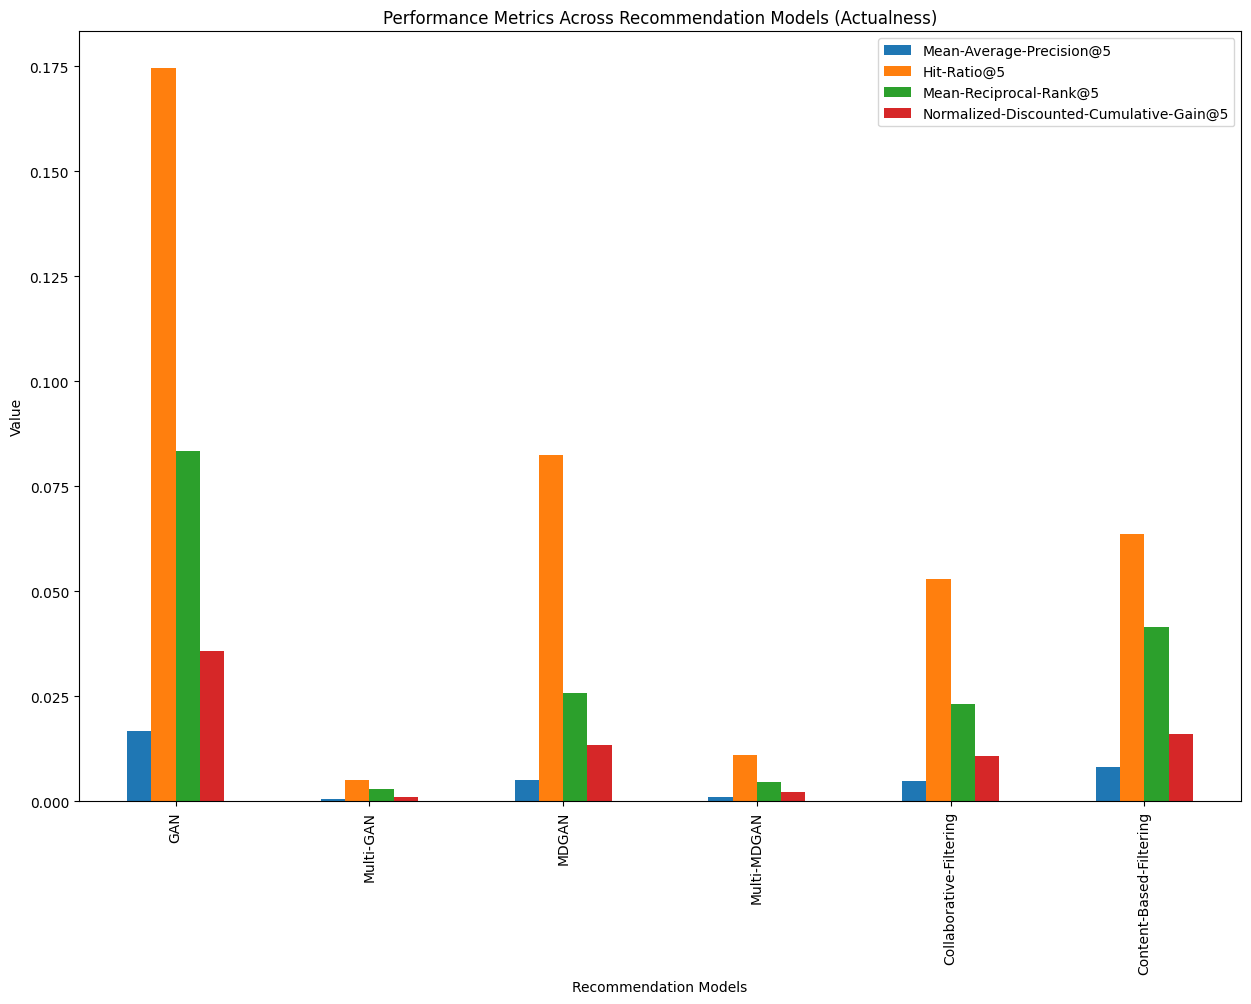

In [ ]:
eval_actual.plot.bar(figsize=(15, 10), y = eval_actual.columns)
plt.xlabel('Recommendation Models')
plt.ylabel("Value")
plt.title("Performance Metrics Across Recommendation Models (Actualness)")
plt.show()

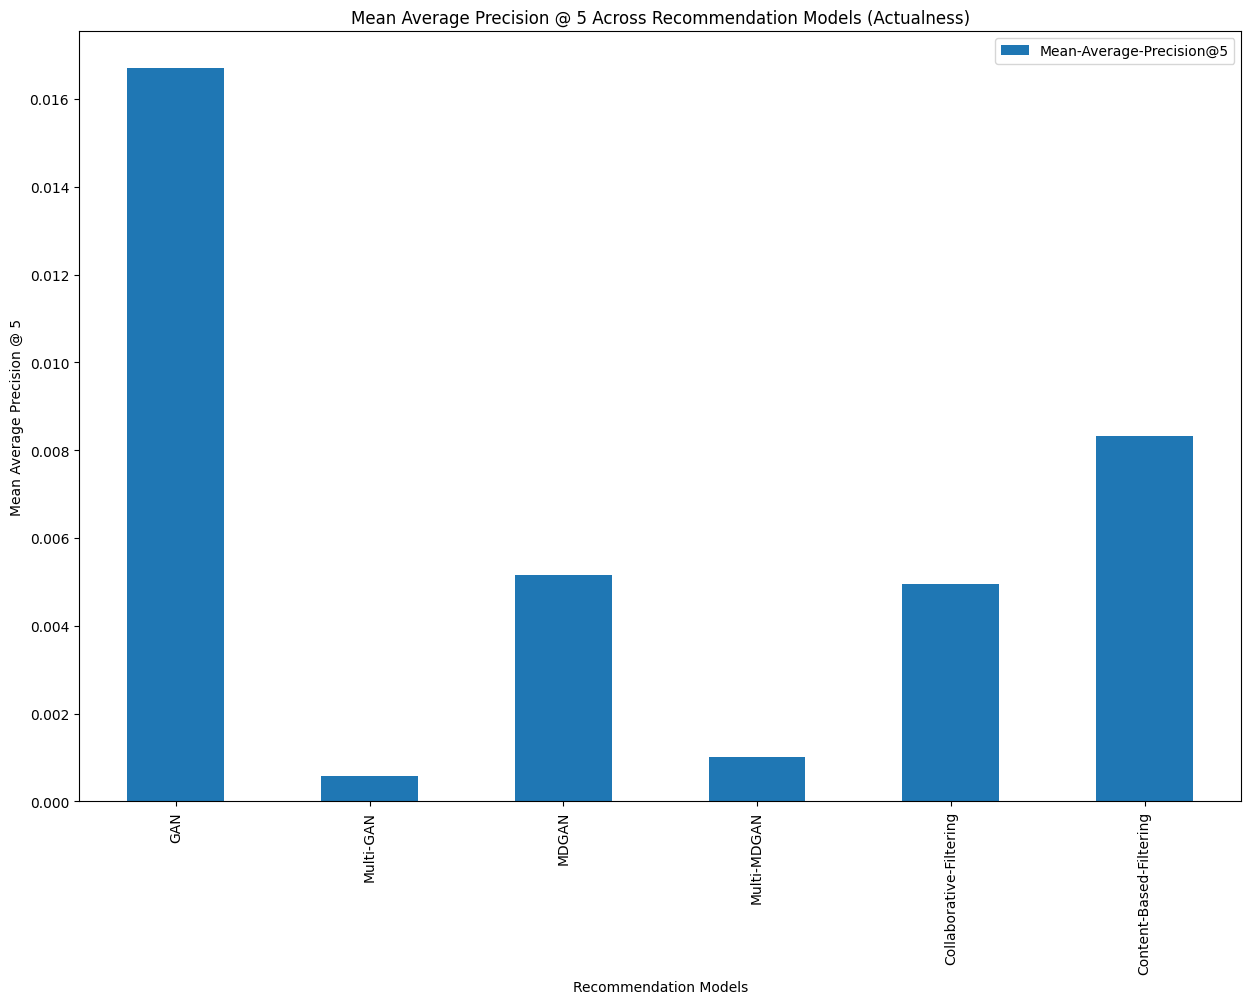

In [ ]:
eval_actual.plot.bar(figsize=(15, 10), y ='Mean-Average-Precision@5')
plt.xlabel('Recommendation Models')
plt.ylabel("Mean Average Precision @ 5")
plt.title("Mean Average Precision @ 5 Across Recommendation Models (Actualness)")
plt.show()

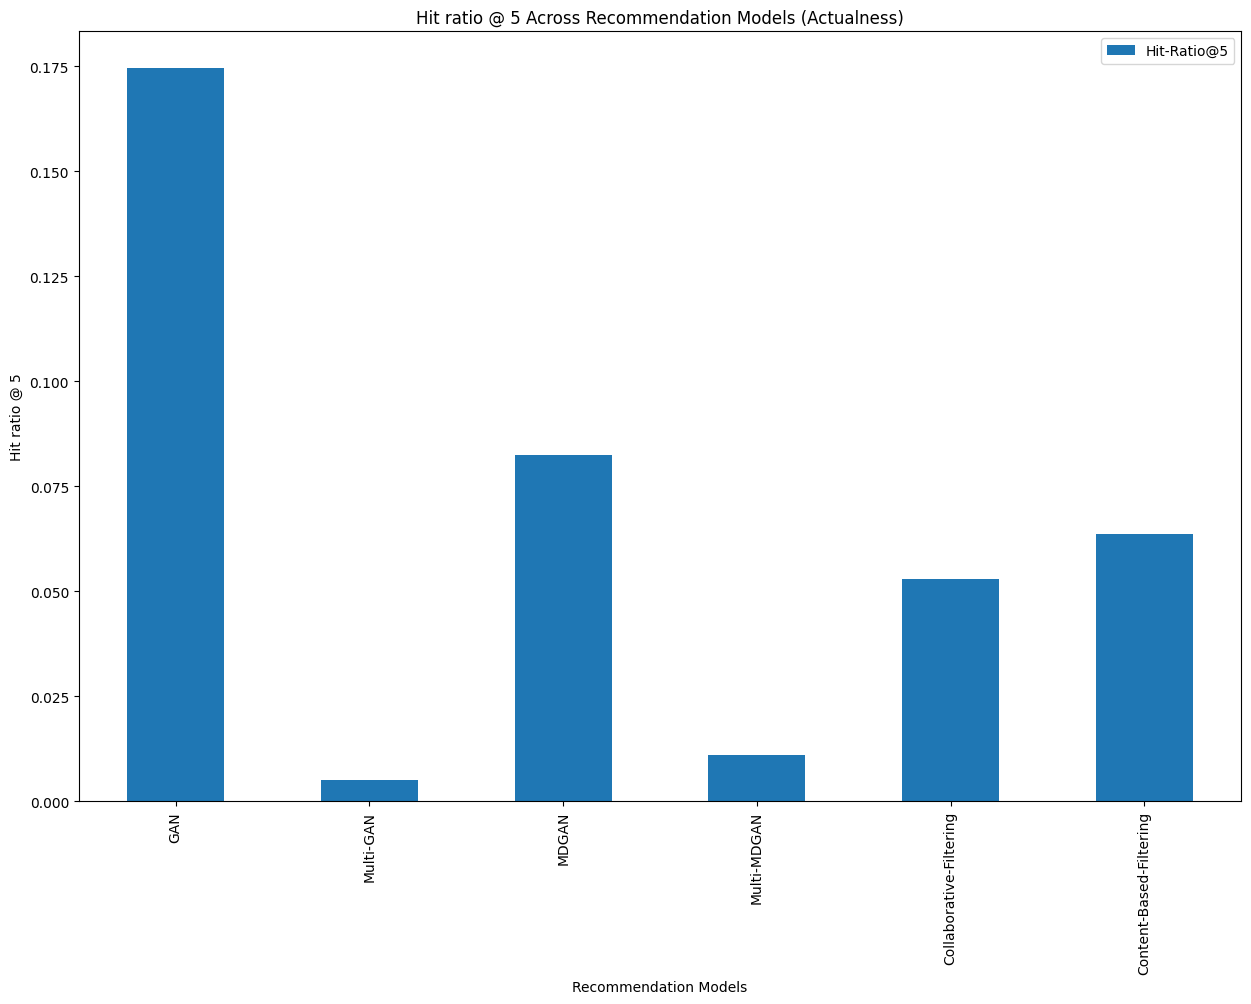

In [ ]:
eval_actual.plot.bar(figsize=(15, 10), y ='Hit-Ratio@5')
plt.xlabel('Recommendation Models')
plt.ylabel("Hit ratio @ 5")
plt.title("Hit ratio @ 5 Across Recommendation Models (Actualness)")
plt.show()

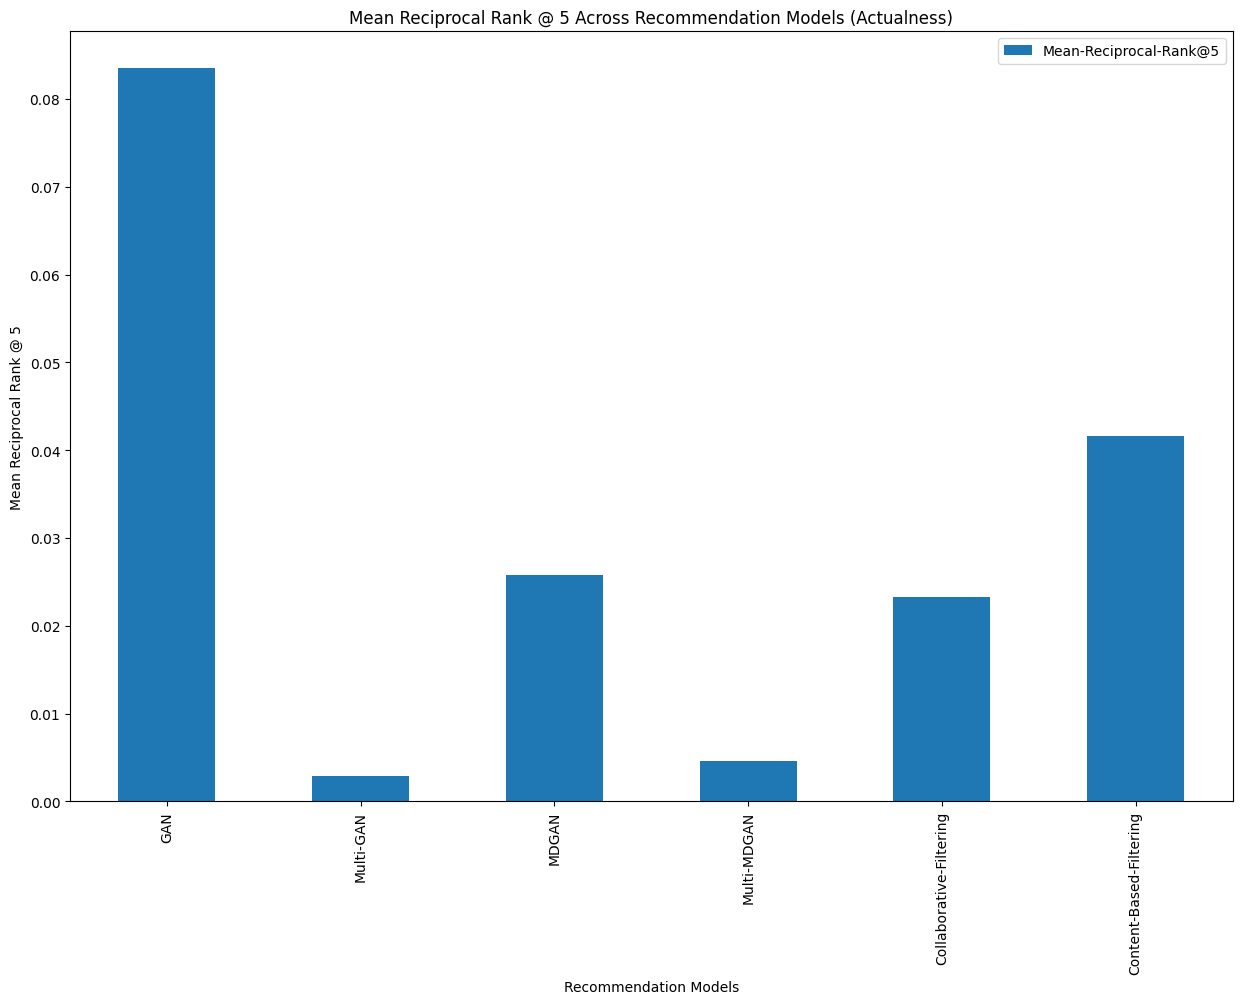

In [ ]:
eval_actual.plot.bar(figsize=(15, 10), y ='Mean-Reciprocal-Rank@5')
plt.xlabel('Recommendation Models')
plt.ylabel("Mean Reciprocal Rank @ 5")
plt.title("Mean Reciprocal Rank @ 5 Across Recommendation Models (Actualness)")
plt.show()

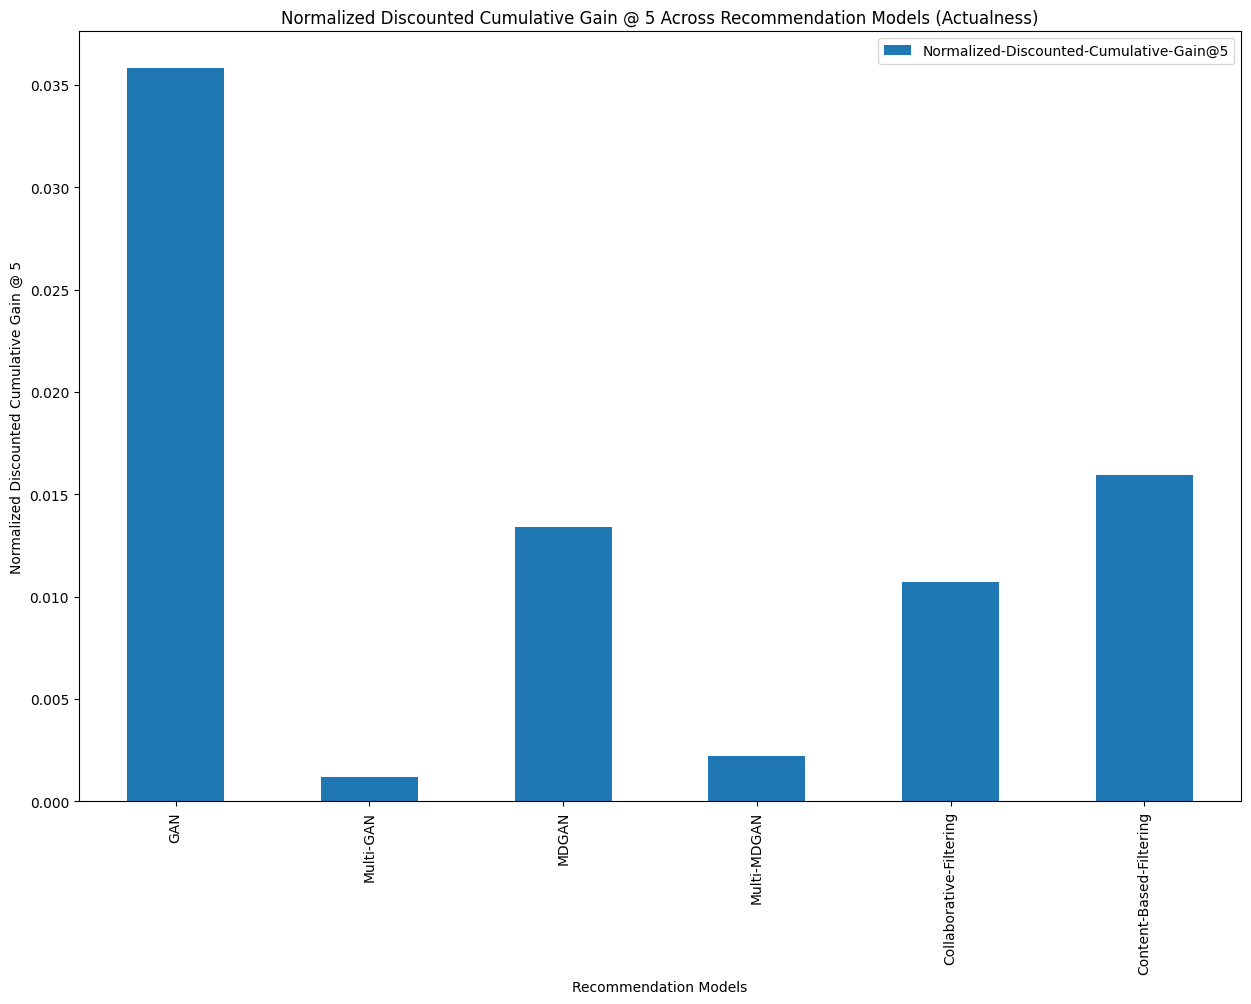

In [ ]:
eval_actual.plot.bar(figsize=(15, 10), y ='Normalized-Discounted-Cumulative-Gain@5')
plt.xlabel('Recommendation Models')
plt.ylabel("Normalized Discounted Cumulative Gain @ 5")
plt.title("Normalized Discounted Cumulative Gain @ 5 Across Recommendation Models (Actualness)")
plt.show()

# Deployment

In [ ]:
data_sample_df = course_all_data[course_all_data['id'].isin(course_sample)]

In [ ]:
data_sample_df_id_name = data_sample_df[['id','name']]

In [ ]:
data_sample_df_id_name = data_sample_df_id_name.sort_values('id')

In [ ]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
pip install deep-translator

In [ ]:
import pandas as pd
import anvil.tables as tables
from anvil.tables import app_tables
from deep_translator import GoogleTranslator

import anvil.server
anvil.server.connect("server_6BVFUANNXFWUYQZ4OJ6WLQSJ-BGPERRITBVMBXFJG")  # Make sure you replace this with your own Uplink key

def import_data(df):
    for d in df.to_dict(orient="records"):
      # d is now a dict of {columnname -> value} for this row
      # We use Python's **kwargs syntax to pass the whole dict as
      # keyword arguments
      app_tables.test.add_row(**d)

import_data(data_sample_df_id_name)

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Course Recommendtion" as SERVER


In [ ]:
@anvil.server.callable
def lookup_val(course):
  c_name = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == course].values[0]
  c_teacher = dict_lookup_course_teacher[course][2:]
  c_school = dict_lookup_course_school[course][2:]

  c_name = GoogleTranslator(source='auto', target='en').translate(c_name)
  c_teacher = GoogleTranslator(source='auto', target='en').translate(c_teacher)
  return c_name, c_teacher, c_school


@anvil.server.callable
def multigan_model(course_1, course_2, course_3, course_4, course_5, course_6, course_7, course_8, course_9):
  courses = [course_1, course_2, course_3, course_4, course_5, course_6, course_7, course_8, course_9]
  courses = [i for i in courses if i is not None]

  courses_list = []
  for i in courses:
    courses_list.append(course_encode[i])

  while len(courses_list) != 9:
    courses_list.insert(0,0)
    if len(courses_list) > 9:
      break


  course_dep = pd.DataFrame(courses_list).T
  course_dep.columns = ['course_1','course_2','course_3','course_4','course_5','course_6','course_7','course_8','course_9']
  course_dep = course_dep.apply(np.vectorize(MinMaxScaler))

  out1 = multigan1.predict(course_dep)
  out2 = multigan2.predict(course_dep)
  out3 = multigan3.predict(course_dep)
  out4 = multigan4.predict(course_dep)
  out5 = multigan5.predict(course_dep)

  out = [out1[0],out2[0],out3[0],out4[0],out5[0]]
  course_dep_out = pd.DataFrame(out).T
  course_dep_out = course_dep_out.apply(np.vectorize(InverseMinMaxScaler))

  course_dep_out_list = list(course_dep_out.iloc[0])

  output1 = course_decode[course_dep_out_list[0]]
  output2 = course_decode[course_dep_out_list[1]]
  output3 = course_decode[course_dep_out_list[2]]
  output4 = course_decode[course_dep_out_list[3]]
  output5 = course_decode[course_dep_out_list[4]]

  out_id = [output1,output2,output3,output4,output5]

  name1 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output1].values[0]
  name2 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output2].values[0]
  name3 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output3].values[0]
  name4 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output4].values[0]
  name5 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output5].values[0]

  name1 = GoogleTranslator(source='auto', target='en').translate(name1)
  name2 = GoogleTranslator(source='auto', target='en').translate(name2)
  name3 = GoogleTranslator(source='auto', target='en').translate(name3)
  name4 = GoogleTranslator(source='auto', target='en').translate(name4)
  name5 = GoogleTranslator(source='auto', target='en').translate(name5)

  out_name = [name1,name2,name3,name4,name5]

  teacher1 = dict_lookup_course_teacher[output1][2:]
  teacher2 = dict_lookup_course_teacher[output2][2:]
  teacher3 = dict_lookup_course_teacher[output3][2:]
  teacher4 = dict_lookup_course_teacher[output4][2:]
  teacher5 = dict_lookup_course_teacher[output5][2:]

  teacher1 = GoogleTranslator(source='auto', target='en').translate(teacher1)
  teacher2 = GoogleTranslator(source='auto', target='en').translate(teacher2)
  teacher3 = GoogleTranslator(source='auto', target='en').translate(teacher3)
  teacher4 = GoogleTranslator(source='auto', target='en').translate(teacher4)
  teacher5 = GoogleTranslator(source='auto', target='en').translate(teacher5)

  out_teacher = [teacher1,teacher2,teacher3,teacher4,teacher5]

  school1 = dict_lookup_course_school[output1][2:]
  school2 = dict_lookup_course_school[output2][2:]
  school3 = dict_lookup_course_school[output3][2:]
  school4 = dict_lookup_course_school[output4][2:]
  school5 = dict_lookup_course_school[output5][2:]

  out_school = [school1,school2,school3,school4,school5]

  return out_id, out_name, out_teacher, out_school

@anvil.server.callable
def multimdgan_model(course_1, course_2, course_3, course_4, course_5, course_6, course_7, course_8, course_9):
  courses = [course_1, course_2, course_3, course_4, course_5, course_6, course_7, course_8, course_9]
  courses = [i for i in courses if i is not None]

  courses_list = []
  for i in courses:
    courses_list.append(course_encode[i])

  while len(courses_list) != 9:
    courses_list.insert(0,0)
    if len(courses_list) > 9:
      break


  course_dep = pd.DataFrame(courses_list).T
  course_dep.columns = ['course_1','course_2','course_3','course_4','course_5','course_6','course_7','course_8','course_9']
  course_dep = course_dep.apply(np.vectorize(MinMaxScaler))

  out1 = multimdgan1.predict(course_dep)
  out2 = multimdgan2.predict(course_dep)
  out3 = multimdgan3.predict(course_dep)
  out4 = multimdgan4.predict(course_dep)
  out5 = multimdgan5.predict(course_dep)

  out = [out1[0],out2[0],out3[0],out4[0],out5[0]]
  course_dep_out = pd.DataFrame(out).T
  course_dep_out = course_dep_out.apply(np.vectorize(InverseMinMaxScaler))

  course_dep_out_list = list(course_dep_out.iloc[0])

  output1 = course_decode[course_dep_out_list[0]]
  output2 = course_decode[course_dep_out_list[1]]
  output3 = course_decode[course_dep_out_list[2]]
  output4 = course_decode[course_dep_out_list[3]]
  output5 = course_decode[course_dep_out_list[4]]

  out_id = [output1,output2,output3,output4,output5]

  name1 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output1].values[0]
  name2 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output2].values[0]
  name3 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output3].values[0]
  name4 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output4].values[0]
  name5 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output5].values[0]

  name1 = GoogleTranslator(source='auto', target='en').translate(name1)
  name2 = GoogleTranslator(source='auto', target='en').translate(name2)
  name3 = GoogleTranslator(source='auto', target='en').translate(name3)
  name4 = GoogleTranslator(source='auto', target='en').translate(name4)
  name5 = GoogleTranslator(source='auto', target='en').translate(name5)

  out_name = [name1,name2,name3,name4,name5]

  teacher1 = dict_lookup_course_teacher[output1][2:]
  teacher2 = dict_lookup_course_teacher[output2][2:]
  teacher3 = dict_lookup_course_teacher[output3][2:]
  teacher4 = dict_lookup_course_teacher[output4][2:]
  teacher5 = dict_lookup_course_teacher[output5][2:]

  teacher1 = GoogleTranslator(source='auto', target='en').translate(teacher1)
  teacher2 = GoogleTranslator(source='auto', target='en').translate(teacher2)
  teacher3 = GoogleTranslator(source='auto', target='en').translate(teacher3)
  teacher4 = GoogleTranslator(source='auto', target='en').translate(teacher4)
  teacher5 = GoogleTranslator(source='auto', target='en').translate(teacher5)

  out_teacher = [teacher1,teacher2,teacher3,teacher4,teacher5]

  school1 = dict_lookup_course_school[output1][2:]
  school2 = dict_lookup_course_school[output2][2:]
  school3 = dict_lookup_course_school[output3][2:]
  school4 = dict_lookup_course_school[output4][2:]
  school5 = dict_lookup_course_school[output5][2:]

  out_school = [school1,school2,school3,school4,school5]

  return out_id, out_name, out_teacher, out_school

@anvil.server.callable
def gan_model(course_1, course_2, course_3, course_4, course_5, course_6, course_7, course_8, course_9):
  courses = [course_1, course_2, course_3, course_4, course_5, course_6, course_7, course_8, course_9]
  courses = [i for i in courses if i is not None]

  courses_list = []
  for i in courses:
    courses_list.append(course_encode[i])

  while len(courses_list) != 9:
    courses_list.insert(0,0)
    if len(courses_list) > 9:
      break


  course_dep = pd.DataFrame(courses_list).T
  course_dep.columns = ['course_1','course_2','course_3','course_4','course_5','course_6','course_7','course_8','course_9']
  #course_dep = course_dep.apply(np.vectorize(MinMaxScaler))

  list_oh_join = []

  for i in range(len(course_sample)+1):
    list_oh_join.append([i]*10)

  data_dep_oh_join = pd.DataFrame(list_oh_join, columns = course_columns)

  frames = [course_dep, data_dep_oh_join]

  new_data_dep = pd.concat(frames)
  new_data_dep = new_data_dep

  enc_dep = OneHotEncoder()
  oh_dep_data = enc_dep.fit_transform(new_data_dep)
  oh_dep_data = oh_dep_data.toarray()
  oh_dep_data = pd.DataFrame(oh_dep_data, columns=enc_dep.get_feature_names_out())
  oh_dep_data = oh_dep_data.iloc[0:1, :-662]
  oh_dep_data.shape[1]


  out_model = gan.predict(oh_dep_data)

  out_df = pd.DataFrame(out_model, columns = [i for i in range(len(course_sample)+1)])

  out_top5 = pd.DataFrame(out_df.apply(lambda x: x.nlargest(5).index.tolist(), axis=1).tolist(), columns=['1','2','3','4','5'])

  output = list(out_top5.iloc[0])

  output1 = course_decode[output[0]]
  output2 = course_decode[output[1]]
  output3 = course_decode[output[2]]
  output4 = course_decode[output[3]]
  output5 = course_decode[output[4]]

  out_id = [output1,output2,output3,output4,output5]

  name1 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output1].values[0]
  name2 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output2].values[0]
  name3 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output3].values[0]
  name4 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output4].values[0]
  name5 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output5].values[0]

  name1 = GoogleTranslator(source='auto', target='en').translate(name1)
  name2 = GoogleTranslator(source='auto', target='en').translate(name2)
  name3 = GoogleTranslator(source='auto', target='en').translate(name3)
  name4 = GoogleTranslator(source='auto', target='en').translate(name4)
  name5 = GoogleTranslator(source='auto', target='en').translate(name5)

  out_name = [name1,name2,name3,name4,name5]

  teacher1 = dict_lookup_course_teacher[output1][2:]
  teacher2 = dict_lookup_course_teacher[output2][2:]
  teacher3 = dict_lookup_course_teacher[output3][2:]
  teacher4 = dict_lookup_course_teacher[output4][2:]
  teacher5 = dict_lookup_course_teacher[output5][2:]

  teacher1 = GoogleTranslator(source='auto', target='en').translate(teacher1)
  teacher2 = GoogleTranslator(source='auto', target='en').translate(teacher2)
  teacher3 = GoogleTranslator(source='auto', target='en').translate(teacher3)
  teacher4 = GoogleTranslator(source='auto', target='en').translate(teacher4)
  teacher5 = GoogleTranslator(source='auto', target='en').translate(teacher5)

  out_teacher = [teacher1,teacher2,teacher3,teacher4,teacher5]

  school1 = dict_lookup_course_school[output1][2:]
  school2 = dict_lookup_course_school[output2][2:]
  school3 = dict_lookup_course_school[output3][2:]
  school4 = dict_lookup_course_school[output4][2:]
  school5 = dict_lookup_course_school[output5][2:]

  out_school = [school1,school2,school3,school4,school5]

  return out_id, out_name, out_teacher, out_school


@anvil.server.callable
def mdgan_model(course_1, course_2, course_3, course_4, course_5, course_6, course_7, course_8, course_9):
  courses = [course_1, course_2, course_3, course_4, course_5, course_6, course_7, course_8, course_9]
  courses = [i for i in courses if i is not None]

  courses_list = []
  for i in courses:
    courses_list.append(course_encode[i])

  while len(courses_list) != 9:
    courses_list.insert(0,0)
    if len(courses_list) > 9:
      break


  course_dep = pd.DataFrame(courses_list).T
  course_dep.columns = ['course_1','course_2','course_3','course_4','course_5','course_6','course_7','course_8','course_9']

  list_oh_join = []

  for i in range(len(course_sample)+1):
    list_oh_join.append([i]*10)

  data_dep_oh_join = pd.DataFrame(list_oh_join, columns = course_columns)

  frames = [course_dep, data_dep_oh_join]

  new_data_dep = pd.concat(frames)
  new_data_dep = new_data_dep

  enc_dep = OneHotEncoder()
  oh_dep_data = enc_dep.fit_transform(new_data_dep)
  oh_dep_data = oh_dep_data.toarray()
  oh_dep_data = pd.DataFrame(oh_dep_data, columns=enc_dep.get_feature_names_out())
  oh_dep_data = oh_dep_data.iloc[0:1, :-662]
  oh_dep_data.shape[1]


  out_model = mdgan.predict(oh_dep_data)

  out_df = pd.DataFrame(out_model, columns = [i for i in range(len(course_sample)+1)])

  out_top5 = pd.DataFrame(out_df.apply(lambda x: x.nlargest(5).index.tolist(), axis=1).tolist(), columns=['1','2','3','4','5'])

  output = list(out_top5.iloc[0])

  output1 = course_decode[output[0]]
  output2 = course_decode[output[1]]
  output3 = course_decode[output[2]]
  output4 = course_decode[output[3]]
  output5 = course_decode[output[4]]

  out_id = [output1,output2,output3,output4,output5]

  name1 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output1].values[0]
  name2 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output2].values[0]
  name3 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output3].values[0]
  name4 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output4].values[0]
  name5 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == output5].values[0]

  name1 = GoogleTranslator(source='auto', target='en').translate(name1)
  name2 = GoogleTranslator(source='auto', target='en').translate(name2)
  name3 = GoogleTranslator(source='auto', target='en').translate(name3)
  name4 = GoogleTranslator(source='auto', target='en').translate(name4)
  name5 = GoogleTranslator(source='auto', target='en').translate(name5)

  out_name = [name1,name2,name3,name4,name5]

  teacher1 = dict_lookup_course_teacher[output1][2:]
  teacher2 = dict_lookup_course_teacher[output2][2:]
  teacher3 = dict_lookup_course_teacher[output3][2:]
  teacher4 = dict_lookup_course_teacher[output4][2:]
  teacher5 = dict_lookup_course_teacher[output5][2:]

  teacher1 = GoogleTranslator(source='auto', target='en').translate(teacher1)
  teacher2 = GoogleTranslator(source='auto', target='en').translate(teacher2)
  teacher3 = GoogleTranslator(source='auto', target='en').translate(teacher3)
  teacher4 = GoogleTranslator(source='auto', target='en').translate(teacher4)
  teacher5 = GoogleTranslator(source='auto', target='en').translate(teacher5)

  out_teacher = [teacher1,teacher2,teacher3,teacher4,teacher5]

  school1 = dict_lookup_course_school[output1][2:]
  school2 = dict_lookup_course_school[output2][2:]
  school3 = dict_lookup_course_school[output3][2:]
  school4 = dict_lookup_course_school[output4][2:]
  school5 = dict_lookup_course_school[output5][2:]

  out_school = [school1,school2,school3,school4,school5]

  return out_id, out_name, out_teacher, out_school

@anvil.server.callable
def cb_model(course_1, course_2, course_3, course_4, course_5, course_6, course_7, course_8, course_9):
  courses = [course_1, course_2, course_3, course_4, course_5, course_6, course_7, course_8, course_9]
  courses = [i for i in courses if i is not None]

  courses_list = []
  for i in courses:
    courses_list.append(course_encode[i])

  while len(courses_list) != 9:
    courses_list.insert(0,0)
    if len(courses_list) > 9:
      break

  output = list(content_recommender(courses_list[-1]))

  out = []
  for i in output:
    out.append(course_decode[i])

  out_id = [out[0],out[1],out[2],out[3],out[4]]

  name1 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == out[0]].values[0]
  name2 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == out[1]].values[0]
  name3 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == out[2]].values[0]
  name4 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == out[3]].values[0]
  name5 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == out[4]].values[0]

  name1 = GoogleTranslator(source='auto', target='en').translate(name1)
  name2 = GoogleTranslator(source='auto', target='en').translate(name2)
  name3 = GoogleTranslator(source='auto', target='en').translate(name3)
  name4 = GoogleTranslator(source='auto', target='en').translate(name4)
  name5 = GoogleTranslator(source='auto', target='en').translate(name5)

  out_name = [name1,name2,name3,name4,name5]

  teacher1 = dict_lookup_course_teacher[out[0]][2:]
  teacher2 = dict_lookup_course_teacher[out[1]][2:]
  teacher3 = dict_lookup_course_teacher[out[2]][2:]
  teacher4 = dict_lookup_course_teacher[out[3]][2:]
  teacher5 = dict_lookup_course_teacher[out[4]][2:]

  teacher1 = GoogleTranslator(source='auto', target='en').translate(teacher1)
  teacher2 = GoogleTranslator(source='auto', target='en').translate(teacher2)
  teacher3 = GoogleTranslator(source='auto', target='en').translate(teacher3)
  teacher4 = GoogleTranslator(source='auto', target='en').translate(teacher4)
  teacher5 = GoogleTranslator(source='auto', target='en').translate(teacher5)

  out_teacher = [teacher1,teacher2,teacher3,teacher4,teacher5]

  school1 = dict_lookup_course_school[out[0]][2:]
  school2 = dict_lookup_course_school[out[1]][2:]
  school3 = dict_lookup_course_school[out[2]][2:]
  school4 = dict_lookup_course_school[out[3]][2:]
  school5 = dict_lookup_course_school[out[4]][2:]

  out_school = [school1,school2,school3,school4,school5]

  return out_id, out_name, out_teacher, out_school

@anvil.server.callable
def cf_model(course_1, course_2, course_3, course_4, course_5, course_6, course_7, course_8, course_9):
  courses = [course_1, course_2, course_3, course_4, course_5, course_6, course_7, course_8, course_9]
  courses = [i for i in courses if i is not None]

  courses_list = []
  for i in courses:
    courses_list.append(course_encode[i])

  while len(courses_list) != 9:
    courses_list.insert(0,0)
    if len(courses_list) > 9:
      break

  output = list(Recommender(courses_list[-1]))

  out = []
  for i in output:
    out.append(course_decode[i])

  out_id = [out[0],out[1],out[2],out[3],out[4]]

  name1 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == out[0]].values[0]
  name2 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == out[1]].values[0]
  name3 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == out[2]].values[0]
  name4 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == out[3]].values[0]
  name5 = data_sample_df_id_name['name'][data_sample_df_id_name['id'] == out[4]].values[0]

  name1 = GoogleTranslator(source='auto', target='en').translate(name1)
  name2 = GoogleTranslator(source='auto', target='en').translate(name2)
  name3 = GoogleTranslator(source='auto', target='en').translate(name3)
  name4 = GoogleTranslator(source='auto', target='en').translate(name4)
  name5 = GoogleTranslator(source='auto', target='en').translate(name5)

  out_name = [name1,name2,name3,name4,name5]

  teacher1 = dict_lookup_course_teacher[out[0]][2:]
  teacher2 = dict_lookup_course_teacher[out[1]][2:]
  teacher3 = dict_lookup_course_teacher[out[2]][2:]
  teacher4 = dict_lookup_course_teacher[out[3]][2:]
  teacher5 = dict_lookup_course_teacher[out[4]][2:]

  teacher1 = GoogleTranslator(source='auto', target='en').translate(teacher1)
  teacher2 = GoogleTranslator(source='auto', target='en').translate(teacher2)
  teacher3 = GoogleTranslator(source='auto', target='en').translate(teacher3)
  teacher4 = GoogleTranslator(source='auto', target='en').translate(teacher4)
  teacher5 = GoogleTranslator(source='auto', target='en').translate(teacher5)

  out_teacher = [teacher1,teacher2,teacher3,teacher4,teacher5]

  school1 = dict_lookup_course_school[out[0]][2:]
  school2 = dict_lookup_course_school[out[1]][2:]
  school3 = dict_lookup_course_school[out[2]][2:]
  school4 = dict_lookup_course_school[out[3]][2:]
  school5 = dict_lookup_course_school[out[4]][2:]

  out_school = [school1,school2,school3,school4,school5]

  return out_id, out_name, out_teacher, out_school

In [ ]:
anvil.server.wait_forever()

1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 133ms/step


1/1 [==============================] - 0s 108ms/step
